In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [3]:
imdb_joined = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst', how='inner')

In [4]:
imdb_joined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [5]:
imdb_joined['title'] = imdb_joined['primary_title']

In [6]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
tn_movie_budgets['title'] = tn_movie_budgets['movie']

In [8]:
df = pd.merge(imdb_joined, tn_movie_budgets, on='title', how='inner')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 15 columns):
tconst               2875 non-null object
primary_title        2875 non-null object
original_title       2875 non-null object
start_year           2875 non-null int64
runtime_minutes      2757 non-null float64
genres               2867 non-null object
averagerating        2875 non-null float64
numvotes             2875 non-null int64
title                2875 non-null object
id                   2875 non-null int64
release_date         2875 non-null object
movie                2875 non-null object
production_budget    2875 non-null object
domestic_gross       2875 non-null object
worldwide_gross      2875 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 359.4+ KB


In [10]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,The Overnight,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,The Overnight,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


In [11]:
# change the type of 'release_date' to timedelta
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
# get 'release_year'
df['release_year'] = df['release_date'].dt.to_period("Y")

In [13]:
# get 'release_month'
df['release_month_year'] = df['release_date'].dt.to_period("M")

In [14]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,26,2012-12-31,Foodfight!,"$45,000,000",$0,"$73,706",2012,2012-12
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,The Overnight,21,2015-06-19,The Overnight,"$200,000","$1,109,808","$1,165,996",2015,2015-06
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,The Overnight,21,2015-06-19,The Overnight,"$200,000","$1,109,808","$1,165,996",2015,2015-06
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,17,2013-03-22,On the Road,"$25,000,000","$720,828","$9,313,302",2013,2013-03
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,17,2013-03-22,On the Road,"$25,000,000","$720,828","$9,313,302",2013,2013-03


In [15]:
# drop unnecessary variables
df.drop(['tconst', 'primary_title', 'original_title', 'start_year', 'id', 'movie'], axis = 1, inplace = True)

In [16]:
df.head()

,runtime_minutes,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,2012-12-31,"$45,000,000",$0,"$73,706",2012,2012-12
1,88.0,NaN,7.5,24,The Overnight,2015-06-19,"$200,000","$1,109,808","$1,165,996",2015,2015-06
2,79.0,"Comedy,Mystery",6.1,14828,The Overnight,2015-06-19,"$200,000","$1,109,808","$1,165,996",2015,2015-06
3,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,2013-03-22,"$25,000,000","$720,828","$9,313,302",2013,2013-03
4,89.0,Drama,6.0,6,On the Road,2013-03-22,"$25,000,000","$720,828","$9,313,302",2013,2013-03


In [17]:
# rearrange columns
df[['title', 'genres', 'runtime_minutes',\
    'averagerating', 'numvotes', 'release_date',\
    'release_year', 'release_month_year', 'production_budget',\
    'domestic_gross', 'worldwide_gross']].head()

,title,genres,runtime_minutes,averagerating,numvotes,release_date,release_year,release_month_year,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",91.0,1.9,8248,2012-12-31,2012,2012-12,"$45,000,000",$0,"$73,706"
1,The Overnight,NaN,88.0,7.5,24,2015-06-19,2015,2015-06,"$200,000","$1,109,808","$1,165,996"
2,The Overnight,"Comedy,Mystery",79.0,6.1,14828,2015-06-19,2015,2015-06,"$200,000","$1,109,808","$1,165,996"
3,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,2013-03-22,2013,2013-03,"$25,000,000","$720,828","$9,313,302"
4,On the Road,Drama,89.0,6.0,6,2013-03-22,2013,2013-03,"$25,000,000","$720,828","$9,313,302"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 11 columns):
runtime_minutes       2757 non-null float64
genres                2867 non-null object
averagerating         2875 non-null float64
numvotes              2875 non-null int64
title                 2875 non-null object
release_date          2875 non-null datetime64[ns]
production_budget     2875 non-null object
domestic_gross        2875 non-null object
worldwide_gross       2875 non-null object
release_year          2875 non-null period[A-DEC]
release_month_year    2875 non-null period[M]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 269.5+ KB


In [19]:
# starting from here, I created two dataframes--df1 and df2.
# we can choose either df1 or df2 to work on. 
# the main difference between df1 and df2 is whether do I keep 'runtime_minutes'

In [20]:
# df1: drop 'runtime_minutes' and get rid of missing values in 'genres'
# return 2867 items

In [21]:
df1 = df.drop('runtime_minutes', axis = 1)

In [22]:
df1.head()

,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,"Action,Animation,Comedy",1.9,8248,Foodfight!,2012-12-31,"$45,000,000",$0,"$73,706",2012,2012-12
1,NaN,7.5,24,The Overnight,2015-06-19,"$200,000","$1,109,808","$1,165,996",2015,2015-06
2,"Comedy,Mystery",6.1,14828,The Overnight,2015-06-19,"$200,000","$1,109,808","$1,165,996",2015,2015-06
3,"Adventure,Drama,Romance",6.1,37886,On the Road,2013-03-22,"$25,000,000","$720,828","$9,313,302",2013,2013-03
4,Drama,6.0,6,On the Road,2013-03-22,"$25,000,000","$720,828","$9,313,302",2013,2013-03


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 10 columns):
genres                2867 non-null object
averagerating         2875 non-null float64
numvotes              2875 non-null int64
title                 2875 non-null object
release_date          2875 non-null datetime64[ns]
production_budget     2875 non-null object
domestic_gross        2875 non-null object
worldwide_gross       2875 non-null object
release_year          2875 non-null period[A-DEC]
release_month_year    2875 non-null period[M]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 247.1+ KB


In [24]:
df1 = df1[~df1['genres'].isna()]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2874
Data columns (total 10 columns):
genres                2867 non-null object
averagerating         2867 non-null float64
numvotes              2867 non-null int64
title                 2867 non-null object
release_date          2867 non-null datetime64[ns]
production_budget     2867 non-null object
domestic_gross        2867 non-null object
worldwide_gross       2867 non-null object
release_year          2867 non-null period[A-DEC]
release_month_year    2867 non-null period[M]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 246.4+ KB


In [26]:
# df2: keep 'runtime_minutes' but get rid of the missing values in both 'runtime_minutes' and 'genres'
# return 2752 items

In [27]:
df2 = df[~df['runtime_minutes'].isna()]

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2757 entries, 0 to 2873
Data columns (total 11 columns):
runtime_minutes       2757 non-null float64
genres                2752 non-null object
averagerating         2757 non-null float64
numvotes              2757 non-null int64
title                 2757 non-null object
release_date          2757 non-null datetime64[ns]
production_budget     2757 non-null object
domestic_gross        2757 non-null object
worldwide_gross       2757 non-null object
release_year          2757 non-null period[A-DEC]
release_month_year    2757 non-null period[M]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 258.5+ KB


In [29]:
df2 = df2[~df2['genres'].isna()]

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2873
Data columns (total 11 columns):
runtime_minutes       2752 non-null float64
genres                2752 non-null object
averagerating         2752 non-null float64
numvotes              2752 non-null int64
title                 2752 non-null object
release_date          2752 non-null datetime64[ns]
production_budget     2752 non-null object
domestic_gross        2752 non-null object
worldwide_gross       2752 non-null object
release_year          2752 non-null period[A-DEC]
release_month_year    2752 non-null period[M]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 258.0+ KB


In [31]:
df2.columns

Index(['runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'release_month_year'],
      dtype='object')

In [32]:
df2['worldwide_gross'].head()

0       $73,706
2    $1,165,996
3    $9,313,302
4    $9,313,302
5    $9,313,302
Name: worldwide_gross, dtype: object

In [33]:
df2.genres.head()

0    Action,Animation,Comedy
2             Comedy,Mystery
3    Adventure,Drama,Romance
4                      Drama
5                      Drama
Name: genres, dtype: object

In [34]:
df2.genres.describe()

count      2752
unique      307
top       Drama
freq        286
Name: genres, dtype: object

In [35]:
pd.value_counts(df2['genres'])
counts = df2['genres'].value_counts().tolist()
len(counts)
df2.groupby(df2['Sex'])

307

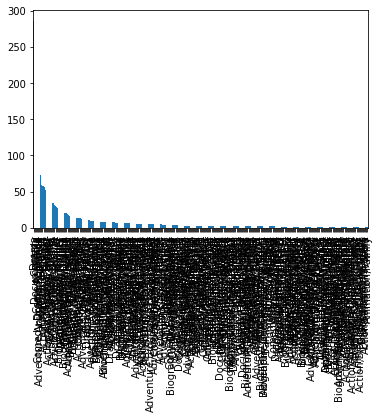

In [67]:
pd.value_counts(df2['genres']).plot(kind='bar')

In [36]:
#Split the whole series over ','
qwe= df2.genres.str.split(",") 

In [37]:
qwe.head()

0    [Action, Animation, Comedy]
2              [Comedy, Mystery]
3    [Adventure, Drama, Romance]
4                        [Drama]
5                        [Drama]
Name: genres, dtype: object

In [38]:
# Make a flat list of all genres 
slist =[]
for x in qwe:
    slist.extend(x)
#or a slicker (but harder to understand) list comprehension: slist = [st for row in s for st in row]


In [39]:
#
pd.Series(slist).value_counts()

Drama          1439
Comedy          742
Action          613
Thriller        493
Adventure       444
Crime           359
Horror          354
Romance         317
Mystery         221
Sci-Fi          200
Documentary     196
Biography       195
Fantasy         172
Family          139
Animation       127
Music            72
History          71
Sport            61
War              39
Musical          21
Western          15
News              3
dtype: int64

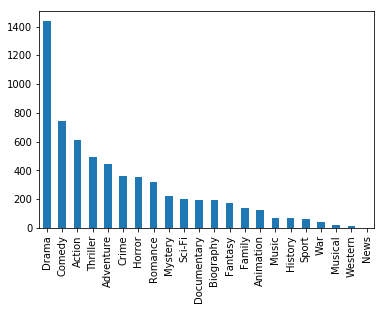

In [40]:
#Plot the 
pd.Series(slist).value_counts().plot(kind='bar')

In [41]:
#df2.info()

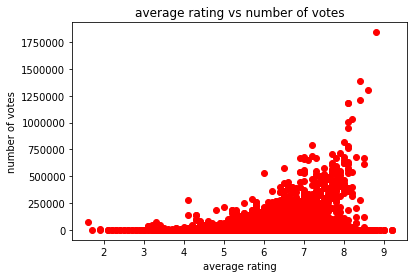

In [42]:
# Plot number of votes vs rating
plt.xlabel('average rating')
plt.ylabel('number of votes')
plt.title('average rating vs number of votes')
plt.plot(df2['averagerating'], df2['numvotes'], 'ro',linewidth=2.0)
plt.show()

In [44]:
#pd.value_counts(df2['genres'])

gkk = df2.groupby(['genres', 'numvotes'])

In [47]:
gkk.shape

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method